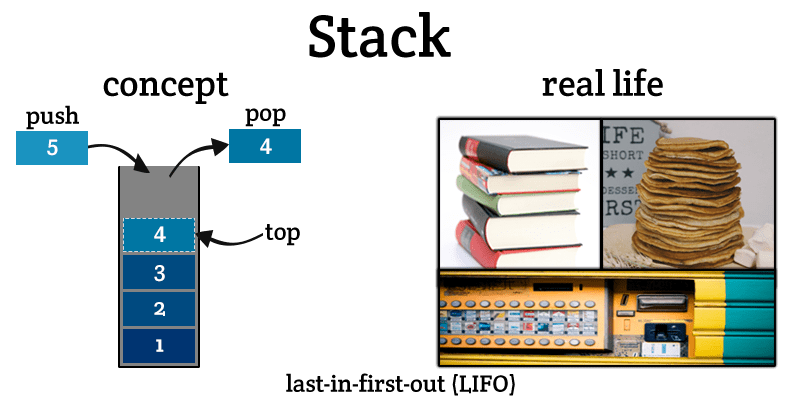




              A stack is a collection of objects that are inserted and removed according to the 
                                   last-in, ﬁrst-out (LIFO) principle.

# Examples

 Internet Web browsers store the addresses of recently visited sites in a stack.

Text editors usually provide an “undo” mechanism that cancels recent editing operations and reverts to former states of a document.

PEZ Candy dispenser

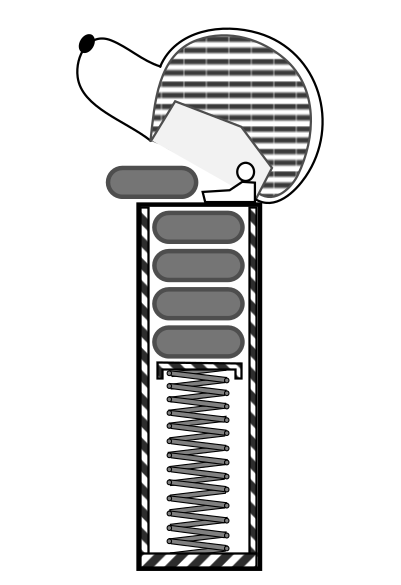

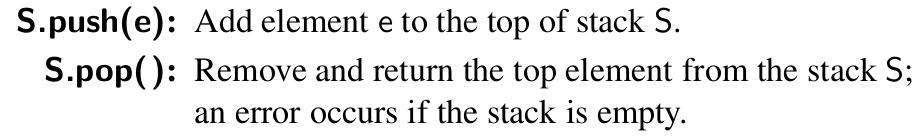

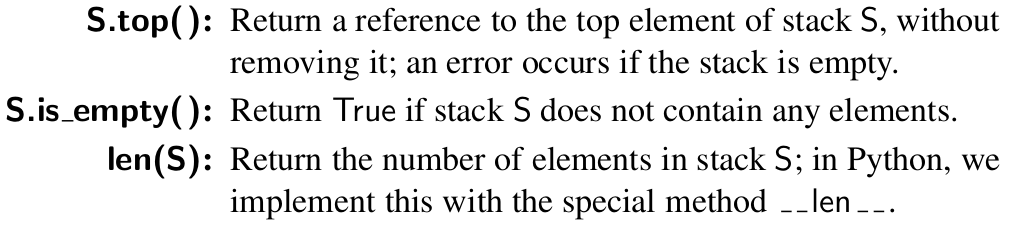




## Simple Array-Based Stack Implementation

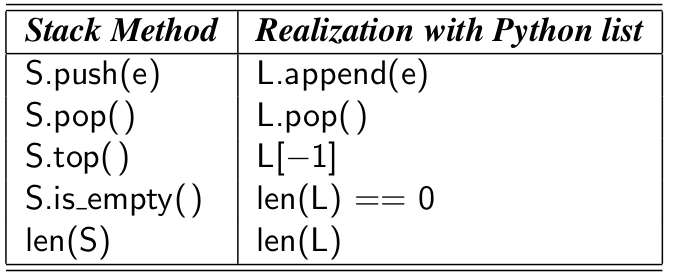

In [1]:
class Empty(Exception):
    pass


class ArrayStack:
    
    def __init__(self):
        
        """ Create an empty stack. """

        self._data = [ ]

    def __len__(self):

        """Return the number of elements in the stack."""

        return len(self._data)

    def is_empty(self):

        """Return True if the stack is empty."""

        return len(self._data) == 0

    def push(self, e):

        """Add element e to the top of the stack."""

        self._data.append(e)

    def top(self):
        
        """
           Return (but do not remove) the element at the top of the stack.

           Raise Empty exception if the stack is empty.

        """

        if self.is_empty():
            raise Empty('Stack is empty')
   
        return self._data[-1]

    def pop(self):

        """
            Remove and return the element from the top of the stack (i.e., LIFO).

            Raise Empty exception if the stack is empty.

        """

        if self.is_empty():
            raise Empty('Stack is empty')
    
        return self._data.pop( )
    
    def multipop(self, k):
        if self.is_empty():
            raise Empty('Stack is empty')
            
        if k > self.__len__():
            while not self.is_empty():
                self.pop()
        else:
            while k > 0:
                self.pop()
                k -= 1
            
    def print_stack(self):
        for i in range(self.__len__()):
            print(self._data[len(self) - 1 - i])    

In [2]:
S = ArrayStack()

In [3]:
S.pop()

Empty: Stack is empty

In [4]:
S.push(1)
S.push(2)
S.push(3)
S.push(4)
S.push(5)
S.push(6)

In [5]:
S.__len__()

6

In [6]:
S.is_empty()

False

In [7]:
S.print_stack()

6
5
4
3
2
1


In [8]:
S.top()

6

In [9]:
S.pop()

6

In [10]:
S.top()

5

In [11]:
S.multipop(2)

In [12]:
S.print_stack()

3
2
1


Reversing Data Using a Stack

In [13]:
def reverse_stack(S):
    S1 = ArrayStack()
    
    for i in range(S.__len__()):
        S1.push(S.pop())
        
    while not S1.is_empty():
        print(S1.pop())

In [14]:
reverse_stack(S)

1
2
3


Matching Parentheses

In [15]:
def is_matched(expr):

    """Return True if all delimiters are properly match; False otherwise."""
    
    lefty = '({['
    righty = ')}]'

    S = ArrayStack()

    for c in expr:
        
        if c in lefty:
            S.push(c)
            
        elif c in righty:
            
            if S.is_empty():
                return False
    
            if righty.index(c) != lefty.index(S.pop()):
                return False

    return S.is_empty()

In [16]:
is_matched('[a*(3+4)+b]')

True

In [17]:
is_matched('[a*(3+4+b]')

False

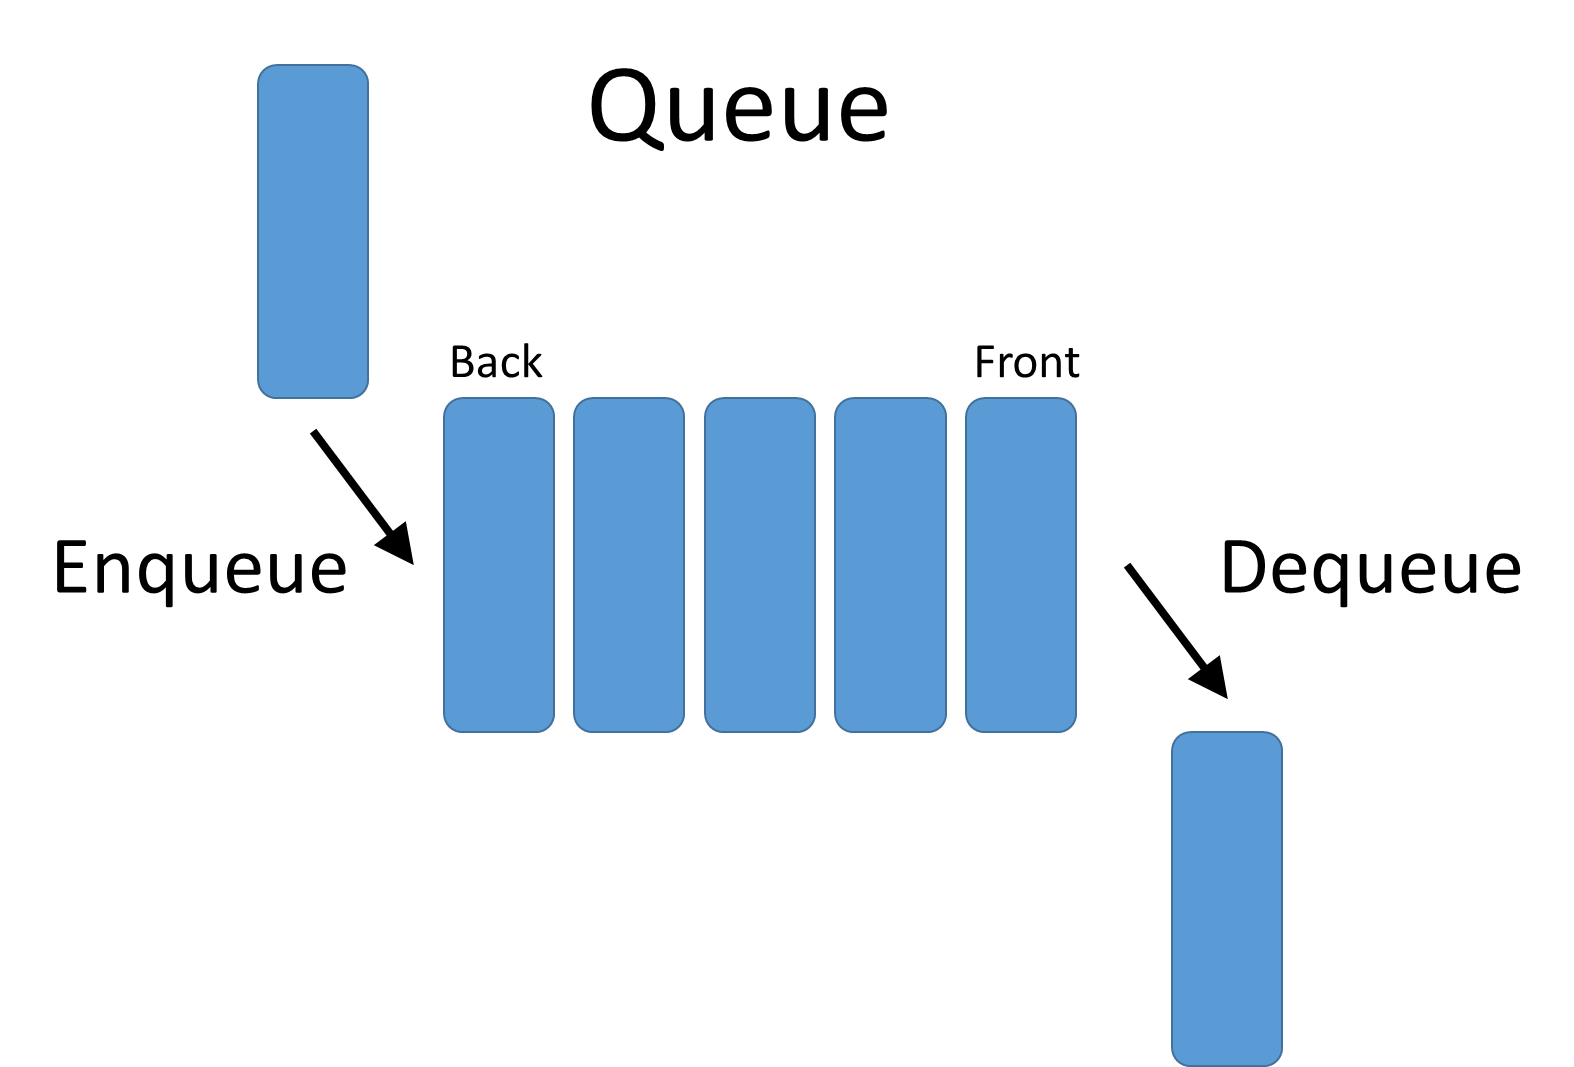

It is a close “cousin” of the stack, as a queue is a collection of objects that are inserted and removed according to the
ﬁrst-in, ﬁrst-out (FIFO) principle.

### Examples

People waiting in line to purchase tickets

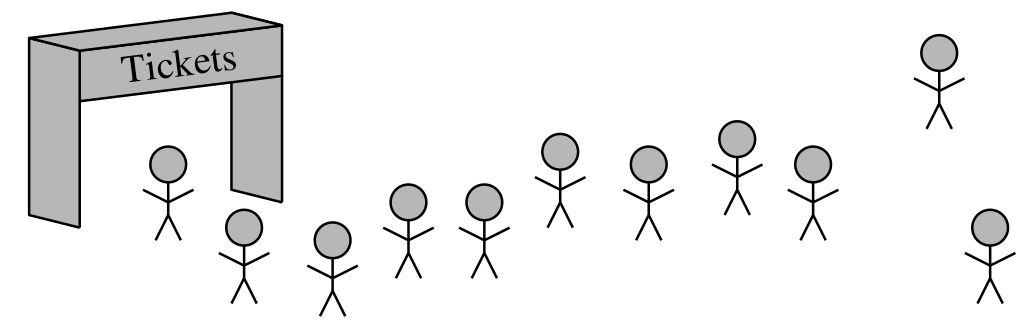

Phone calls being routed to a customer service center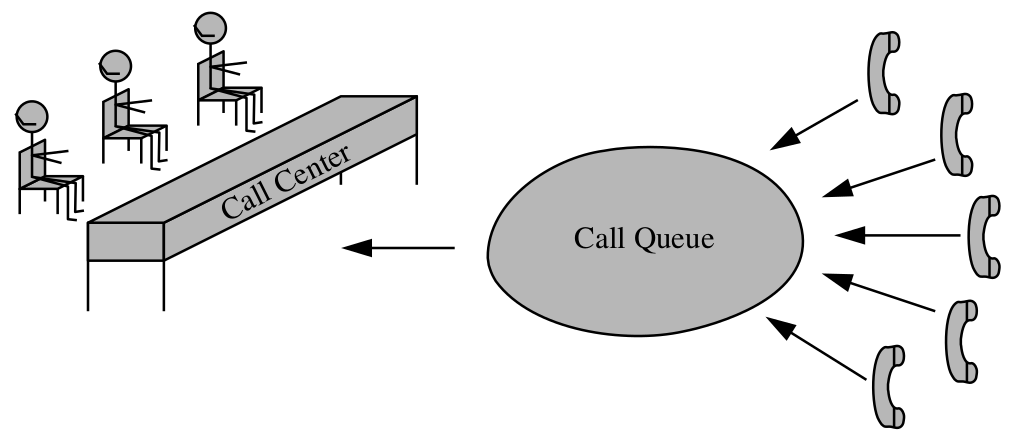

### Fundamental methods

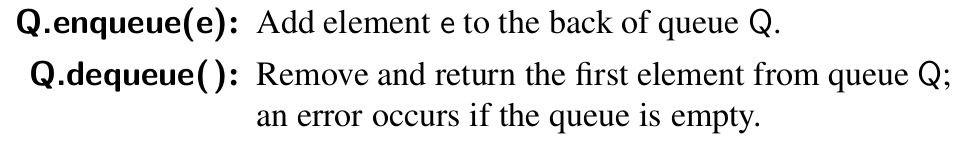

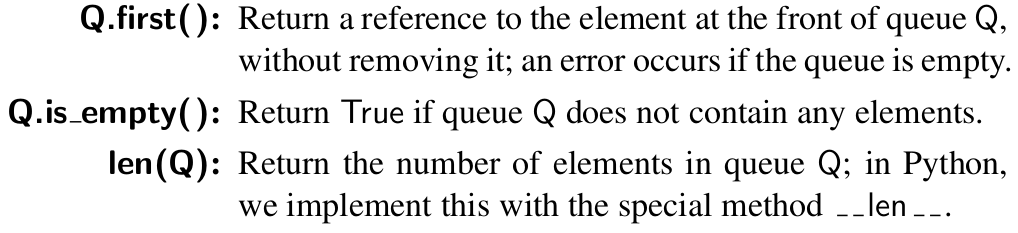




### Array-Based Queue Implementation

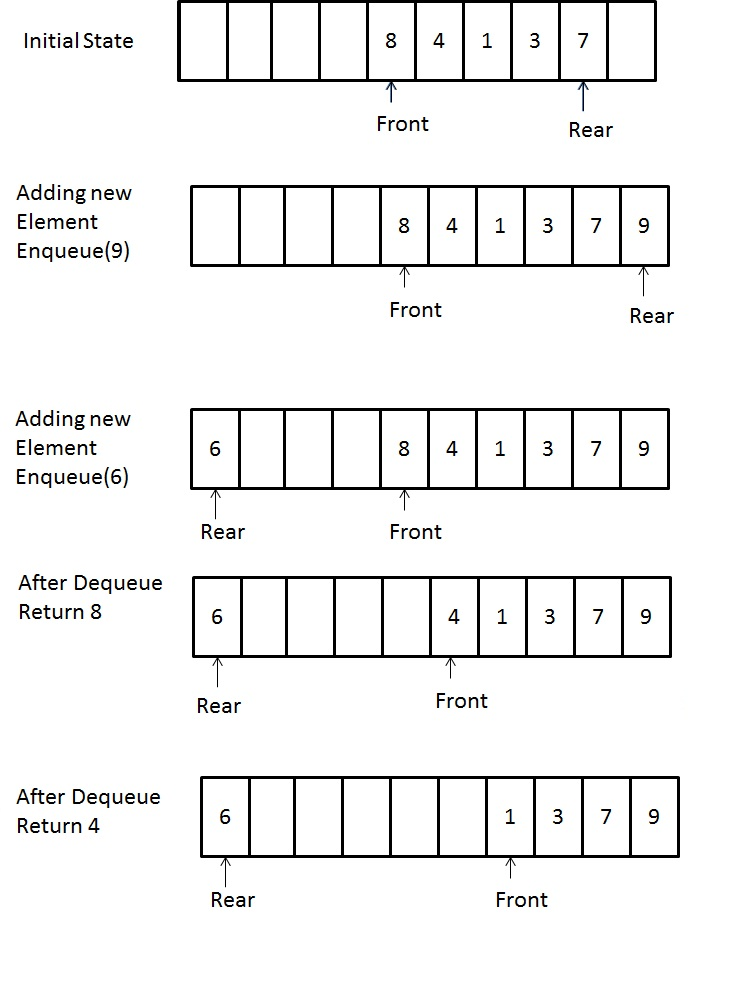

In [33]:
class Empty(Exception):
    pass

class ArrayQueue:

    """FIFO queue implementation using a Python list as underlying storage."""

    DEFAULT_CAPACITY = 10


    def __init__(self):

        """Create an empty queue."""

        self._data = [None] * ArrayQueue.DEFAULT_CAPACITY
        self.size = 0
        self.front = 0

    def __len__ (self):

        """Return the number of elements in the queue."""

        return self.size

    def is_empty(self):

        """Return True if the queue is empty."""

        return self.size == 0

    def ﬁrst(self):
        
        """
            Return (but do not remove) the element at the front of the queue.

            Raise Empty exception if the queue is empty.

        """

        if self.is_empty():
            raise Empty('Queue is empty')

        return self._data[self.front]

    def dequeue(self):

        """
            Remove and return the ﬁrst element of the queue (i.e., FIFO).

            Raise Empty exception if the queue is empty.

        """
        if self.is_empty():
            raise Empty('Queue is empty ')

        answer = self._data[self.front]
        self._data[self.front] = None
        self.front = (self.front + 1) % len(self._data)
        self.size -= 1
        
        return answer
    
    def enqueue(self, e):
        
        """Add an element to the back of queue."""
        
        if self.size == len(self._data):
           
            self.resize(2 * len(self._data))
            
        avail = (self.front + self.size) % len(self._data)
        self._data[avail] = e
        self.size += 1
        
    def resize(self, cap):
        
        """Resize to a new list of capacity >= len(self)."""
        
        old = self._data
        self._data = [None] * cap
        walk = self.front

        for k in range(self.size):
       
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        
        self.front = 0
    
    def print_queue(self):
        for i in range(len(self._data)):
            print(self._data[i]) 

In [34]:
Q = ArrayQueue()

In [35]:
Q.dequeue()

Empty: Queue is empty 

In [36]:
Q.enqueue(1)
Q.enqueue(2)
Q.enqueue(3)
Q.enqueue(4)
Q.enqueue(5)
Q.enqueue(6)
Q.enqueue(7)
Q.enqueue(8)

In [37]:
Q.print_queue()

1
2
3
4
5
6
7
8
None
None


In [38]:
Q.first()

1

In [39]:
Q.dequeue()

1

In [40]:
Q.first()

2

In [41]:
Q.is_empty()

False

In [42]:
Q.print_queue()

None
2
3
4
5
6
7
8
None
None


In [43]:
Q.enqueue(9)
Q.enqueue(10)
Q.enqueue(11)
Q.enqueue(12)
Q.enqueue(13)

In [44]:
Q.print_queue()

2
3
4
5
6
7
8
9
10
11
12
13
None
None
None
None
None
None
None
None


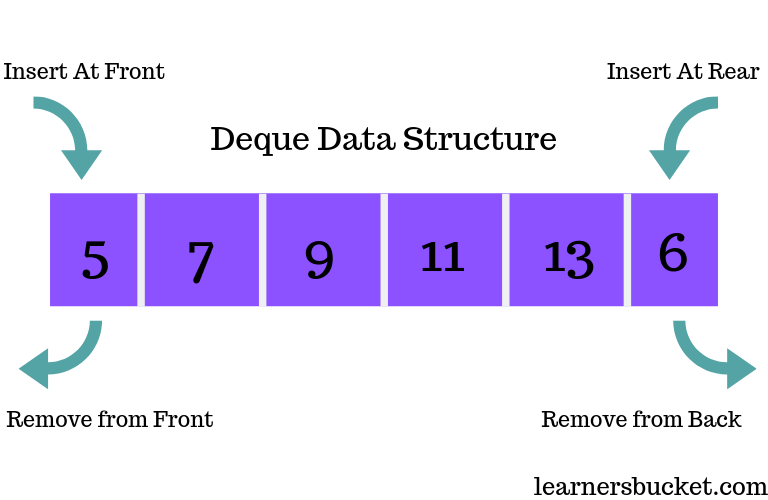

Fundamental methods

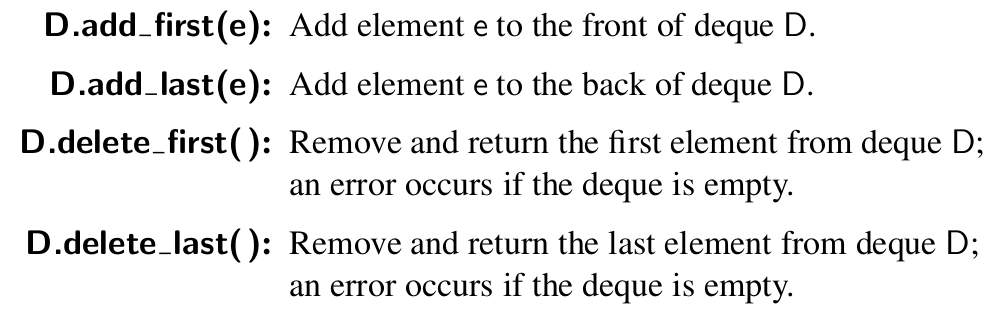

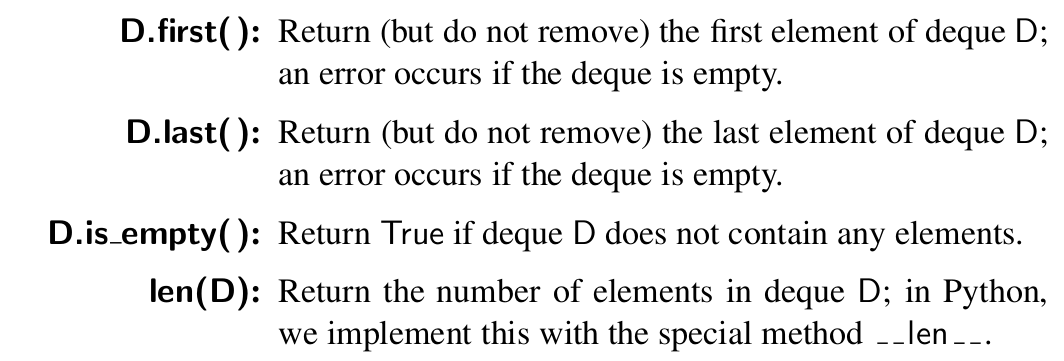

### Implementing a Deque with a Circular Array

In [51]:
class Empty(Exception):
    pass


class ArrayDeque:
    
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self.items = [None] * ArrayDeque.DEFAULT_CAPACITY
        self.size = 0
        self.front = 0
        
    def __len__(self):
        return self.size
    
    def is_empty(self):
        return self.size == 0
    
    def first(self):
        
        if self.is_empty():
            raise Empty('Queue is empty.')
        return self.items[self.front]
    
    def last(self):
        
        if self.is_empty():
            raise Empty('Queue is empty.')
        return self.items[(self.front + self.size -1) % len(self.items)]
    
    def delete_first(self):
        if self.is_empty():
            raise Empty('Queue is empty.')
        item = self.items[self.front]
        self.items[self.front] = None
        self.front = (self.front + 1)%len(self.items)
        self.size -= 1
        return item
    
    def delete_last(self):
        if self.is_empty():
            raise Empty('Queue is empty.')
        item = self.items[(self.front + self.size -1)%len(self.items)]
        self.items[(self.front + self.size -1)%len(self.items)] = None
        self.size -= 1
        return item
    
    def add_last(self, e):
        if self.size == len(self.items):
            self.resize(2 * len(self.items))
        avail = (self.front + self.size)% len(self.items)
        self.items[avail] = e
        self.size += 1
        
    def add_first(self, e):
        if self.size == len(self.items):
            self.resize(2 * len(self.items))
        self.front = (self.front - 1)% len(self.items)
        self.items[self.front] = e
        self.size += 1
            
    def resize(self, cap):
        old = self.items
        self.items = [None] * cap
        walk = self.front
        for k in range (self.size):
            self.items[k] = old[walk]
            walk = (1+walk)% len(old)
            
        self.front = 0

    def print_deque(self):
        for i in range(len(self.items)):
            print(self.items[i])

In [52]:
D = ArrayDeque()

In [53]:
D.first()

Empty: Queue is empty.

In [54]:
D.add_first(1)
D.add_first(2)
D.add_first(3)

In [56]:
D.print_deque()

None
None
None
None
None
None
None
3
2
1


In [57]:
D.first()

3

In [59]:
D.last()

1

In [60]:
D.delete_first()

3

In [61]:
D.print_deque()

None
None
None
None
None
None
None
None
2
1


In [62]:
D.delete_last()

1

In [63]:
D.print_deque()

None
None
None
None
None
None
None
None
2
None
